# Data Inspection




In [1]:
!pip install tensorflow
!pip install facets_overview
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00


In [2]:
#@title Import Libraries

#Importing revelant libraries and installing facets for visualisation
import pandas as pd  #gestione dati tabellari
import matplotlib.pyplot as plt
from numpy import*
from sklearn import*
import tensorflow as tf
from tensorflow import keras
import numpy as np
from google.colab import drive
import scipy.stats
import pylab
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.stats import kstest, ks_2samp
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
from scipy.signal import correlate
from statsmodels.tsa.arima.model import ARIMA
from statsmodels import*
from sklearn.preprocessing import MinMaxScaler
from pmdarima.arima import auto_arima

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse as rmse_function
from statsmodels.tools.eval_measures import aic

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import itertools
from tqdm import tqdm
from scipy.stats import chi2

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Keras (2.X on - I used 2.7 but the below should work for any version.)
from keras.layers import Dense, SpatialDropout3D
from keras.models import Sequential

# For facets
from IPython.core.display import display, HTML
import base64
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

In [3]:
#@title Download Dataset

!wget -O temp_humid_data.xlsx https://www.dropbox.com/scl/fi/ku56jqerae5zbj9di3ymq/temp_humid_data.xlsx?rlkey=psmmgjxkt2d0xmbhdmzyxper8&dl=0

--2023-12-18 17:01:19--  https://www.dropbox.com/scl/fi/ku56jqerae5zbj9di3ymq/temp_humid_data.xlsx?rlkey=psmmgjxkt2d0xmbhdmzyxper8
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /c/scl/fi/ku56jqerae5zbj9di3ymq/temp_humid_data.xlsx?rlkey=psmmgjxkt2d0xmbhdmzyxper8 [following]
--2023-12-18 17:01:20--  https://www.dropbox.com/c/scl/fi/ku56jqerae5zbj9di3ymq/temp_humid_data.xlsx?rlkey=psmmgjxkt2d0xmbhdmzyxper8
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7277a4285e2f9059d163f21a88.dl.dropboxusercontent.com/cd/0/get/CJpgfJIIjzXYvdwmYiyofs9B-F6RykyO3A3y5eKisa1Nij6GNJWatAnAeNKdb1Jjp2ZIaHIWNS82GIR56dCfgvmeODMMGgq7rNKxDXdJm-zXmOuqoHGs-vY2NURprW5HV5BXHh0N22lCWq1a0os72QuD/file# [following]
--2023-12-18 17:01:22--  https://uc7277a4285e2f9059d16

In [4]:
#@title Read Dataset

# Replace with your file's path
file_path = '/content/temp_humid_data.xlsx'

# Read the first sheet (assuming it's the first by order)
df_1 = pd.read_excel(file_path, sheet_name=0)

# Read the third sheet (assuming it's the third by order)
df_2 = pd.read_excel(file_path, sheet_name=1)

df_1.to_csv("yearly_data.csv")
df_2.to_csv("seasonal_data.csv")

print(df_1.dtypes)
print('\n')
print(df_2.dtypes)

time                      object
temperature_mean         float64
relativehumidity_mean      int64
dtype: object


Date                     datetime64[ns]
no. of Adult males                int64
temperature_mean                float64
relativehumidity_mean             int64
dtype: object


In [5]:
#@title Data without target

df_1.describe()

,temperature_mean,relativehumidity_mean
count,365.000000,365.000000
mean,16.038740,61.249315
std,7.965726,15.660750
min,1.330000,26.000000
25%,9.150000,50.000000
50%,15.410000,61.000000
75%,23.410000,72.000000
max,32.410000,94.000000


In [6]:
#@title Data with Target

df_2.describe()

,no. of Adult males,temperature_mean,relativehumidity_mean
count,106.000000,106.000000,106.000000
mean,0.415094,25.015566,50.283019
std,1.120101,3.768792,11.928162
min,0.000000,14.030000,26.000000
25%,0.000000,23.700000,41.250000
50%,0.000000,25.640000,51.500000
75%,0.000000,27.297500,58.000000
max,6.000000,32.410000,81.000000


In [7]:
#@title Formatting dates and setting them as index
df_1['time'] = pd.to_datetime(df_1['time'])
df_1.set_index('time', inplace=True)

In [8]:
df_2['Date'] = pd.to_datetime(df_2['Date'], format='%d-%b')
# Set year for the second dataframe as 2022
df_2['Date'] = df_2['Date'].apply(lambda x: x.replace(year=2022))
df_2.set_index('Date', inplace=True)

In [9]:
print(df_1.index)
print(df_2.index)

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='time', length=365, freq=None)
DatetimeIndex(['2022-06-15', '2022-06-16', '2022-06-17', '2022-06-18',
               '2022-06-19', '2022-06-20', '2022-06-21', '2022-06-22',
               '2022-06-23', '2022-06-24',
               ...
               '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22',
               '2022-09-23', '2022-09-24', '2022-09-25', '2022-09-26',
               '2022-09-27', '2022-09-28'],
              dtype='datetime64[ns]', name='Date', length=106, freq=None)


In [10]:
#@title Setting frequency
df_1 = df_1.asfreq("d")
df_2 = df_2.asfreq("d")

In [26]:
#@title Graphic Function
# DFS unico df
def specific_plot_line_and_distribution(df, date_col, figsize=(15, 6)):
    """
    Plots line graphs and distribution plots for common columns in the given DataFrame.
    The graphs are displayed in a 2x2 grid, with line plots on the top row and distribution plots on the bottom row.

    Parameters:
    df (pandas DataFrame): The DataFrame to be visualized.
    date_col (str): Name of the column containing date information.
    figsize (tuple): Size of the figure (width, height).
    """
    # Get all columns in the DataFrame
    all_columns = set(df.columns)

    # If there are no columns or less than 2, return
    if not all_columns:
        print("No columns to plot.")
        return
    if len(all_columns) < 2:
        print("Not enough columns to create a 2x2 grid.")
        return

    # Select the first two columns for plotting
    #selected_columns = list(all_columns)[:2]
    col = 'no. of Adult males'

    # Create figure and axes for a 2x2 grid
    fig, axs = plt.subplots(1, 2, figsize=figsize)

    # Plot line plots and distribution plots
    #for i, col in enumerate(selected_columns):
        # Line plot
    ax_line = axs[0]
    sns.lineplot(data=df, x=df.index, y=col, ax=ax_line)
    ax_line.set_title(f'Lineplot of {col}')
    ax_line.legend(['DF'])
    ax_line.grid(True)

    # Distribution plot
    ax_dist = axs[1]
    sns.histplot(df[col], kde=True, ax=ax_dist)
    ax_dist.set_title(f'Distribution of {col}')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()



# DFS lista di df
def plot_line_and_distribution(dfs, date_col, figsize=(15, 10)):
    """
    Plots line graphs and distribution plots of common columns in the given dataframes.
    The graphs are plotted in a 2x2 grid, with line plots on the top row and distribution plots on the bottom row.

    Parameters:
    dfs (list): List of pandas DataFrames.
    date_col (str): Name of the column containing the date.
    figsize (tuple): Size of the figure (width, height).
    """
    # Convert the date column to datetime in all dataframes and set it as index
    for df in dfs:
        if date_col in df.columns:
            df[date_col] = pd.to_datetime(df[date_col])
            df.set_index(date_col, inplace=True)

    # Find common columns in all dataframes
    common_columns = set(dfs[0].columns)
    for df in dfs[1:]:
        common_columns.intersection_update(df.columns)

    # If there are no common columns or less than 2, return
    if not common_columns:
        print("No common columns to plot.")
        return
    if len(common_columns) < 2:
        print("Not enough common columns to create a 2x2 grid.")
        return

    # Select the first two common columns for plotting
    selected_columns = list(common_columns)[:2]

    # Create figure and axes for a 2x2 grid
    fig, axs = plt.subplots(2, 2, figsize=figsize)

    # Plot line plots and distribution plots
    for i, col in enumerate(selected_columns):
        # Line plot
        ax_line = axs[0, i]
        for df in dfs:
            sns.lineplot(data=df, x=df.index, y=col, ax=ax_line)
        ax_line.set_title(f'Lineplot of {col}')
        ax_line.legend([f'DF{i+1}' for i in range(len(dfs))])
        ax_line.grid(True)

        # Distribution plot
        ax_dist = axs[1, i]
        for df in dfs:
            sns.histplot(df[col], kde=True, ax=ax_dist)
        ax_dist.set_title(f'Distribution of {col}')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()



# Visualize the Data in Facets

def patch_asscalar(a):
    """
    Patch function for asscalar in numpy.
    Used to address compatibility issues with numpy in specific scenarios.

    Parameters:
    a: Numpy array or scalar value.

    Returns:
    Item value of the input array or scalar.
    """
    return a.item()



def interactive_inspection(df):
    """
    Interactive inspection of DataFrame using Facets Overview.
    Utilizes the FeatureStatisticsGenerator from Google's Facets library.

    Parameters:
    df (pandas DataFrame): The DataFrame to be inspected interactively.

    Returns:
    Analisys of df's values.
    """
    setattr(np, "asscalar", patch_asscalar)
    #paradigma a oggetti
    # Create instance of FSG
    fsg = FeatureStatisticsGenerator()

    #Select dataframe
    dataframes = [{'table': df, 'name': 'trainData'}]
    censusProto = fsg.ProtoFromDataFrames(dataframes)

    #Serialise
    protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")

    #Select template
    HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
            <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
            <facets-overview id="elem"></facets-overview>
            <script>
              document.querySelector("#elem").protoInput = "{protostr}";
            </script>"""

    #Query and display
    html = HTML_TEMPLATE.format(protostr=protostr)
    return display(HTML(html))



def figure_plot(df):
  """
  Interactive plot of curves for specified DataFrame.
  Adds interactive curves for 'Relative Humidity' and 'Temperature' columns to the plot.

  Parameters:
  df (pandas DataFrame): DataFrame containing the data for plotting.
  """
  # Interactive Plots
  trace1 = go.Scatter(x=df.index, y=df['relativehumidity_mean'], mode='lines', name='Relative Humidity')
  trace2 = go.Scatter(x=df.index, y=df['temperature_mean'], mode='lines', name='Temperature')

  fig.add_trace(trace1)
  fig.add_trace(trace2)

  # Show Graphics
  return fig.show()



def plot_results(x1, y1, x2, y2):
  """
  Creates a scatter plot to visualize predicted values against actual values.

  This function generates a scatter plot comparing 'Actual' and 'Predicted' values over time.

  Returns:
  None
  """
  figure = plt.figure(figsize=(10, 4))
  plt.plot(x1, y1, label='Actual', color='blue')
  plt.plot(x2, y2, label='Predicted', color='red')
  plt.xlabel('Data')
  plt.ylabel('No. of Adult males')
  plt.title('Confronto tra Valori Effettivi e Previsti')
  plt.legend()
  plt.show()
  return


def plot_scatter_with_size(df, x_col, y_col, size_col, figsize=(10, 6)):
    """
    Creates a scatter plot using two columns from a dataframe,
    with the size of the points determined by a third column.

    Parameters:
    df (pandas.DataFrame): The dataframe to plot.
    x_col (str): Name of the column for the x-axis.
    y_col (str): Name of the column for the y-axis.
    size_col (str): Name of the column to determine the size of the points.
    figsize (tuple): Size of the figure (width, height).
    """
    plt.figure(figsize=figsize)
    sns.scatterplot(data=df, x=x_col, y=y_col, size=size_col, legend=False, sizes=(20, 200))

    plt.title(f'Scatter Plot of {x_col} vs {y_col} with Point Size by {size_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    plt.show()


Plot of Data Distribution using a single DataFrame

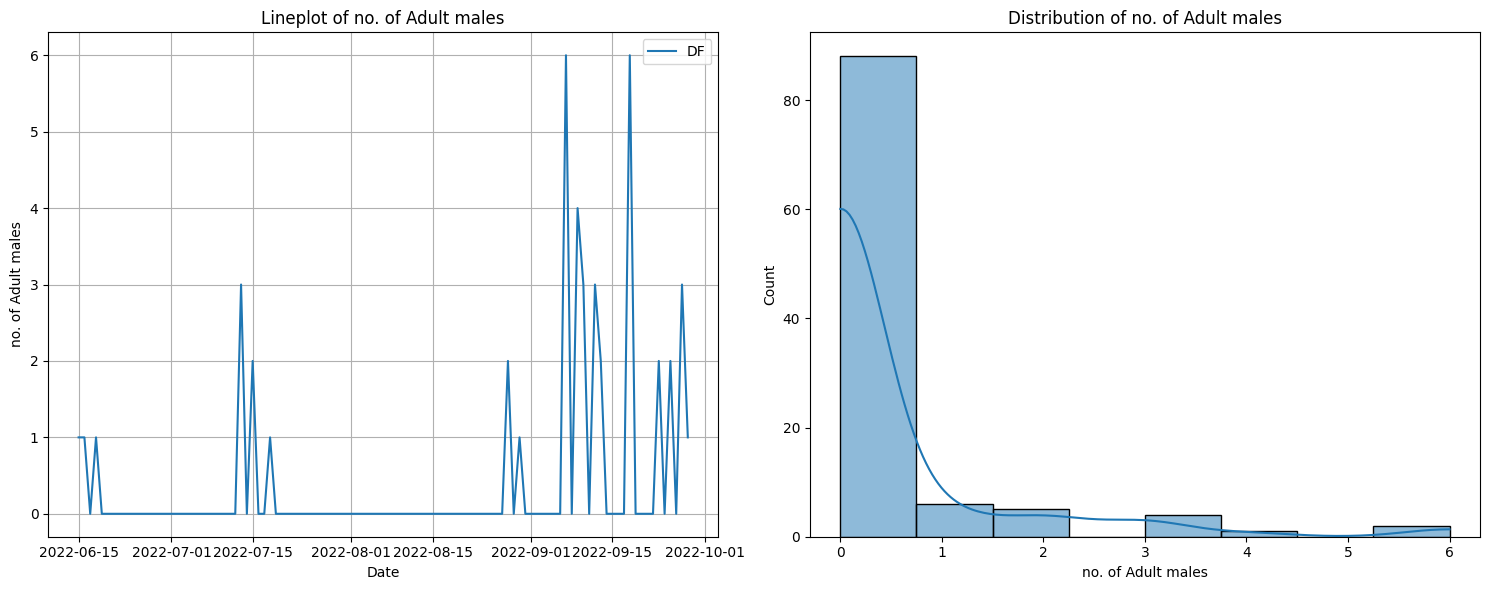

In [12]:
specific_plot_line_and_distribution(df_2, 'Date')

Plot of Data Distribution using a list of DataFrame

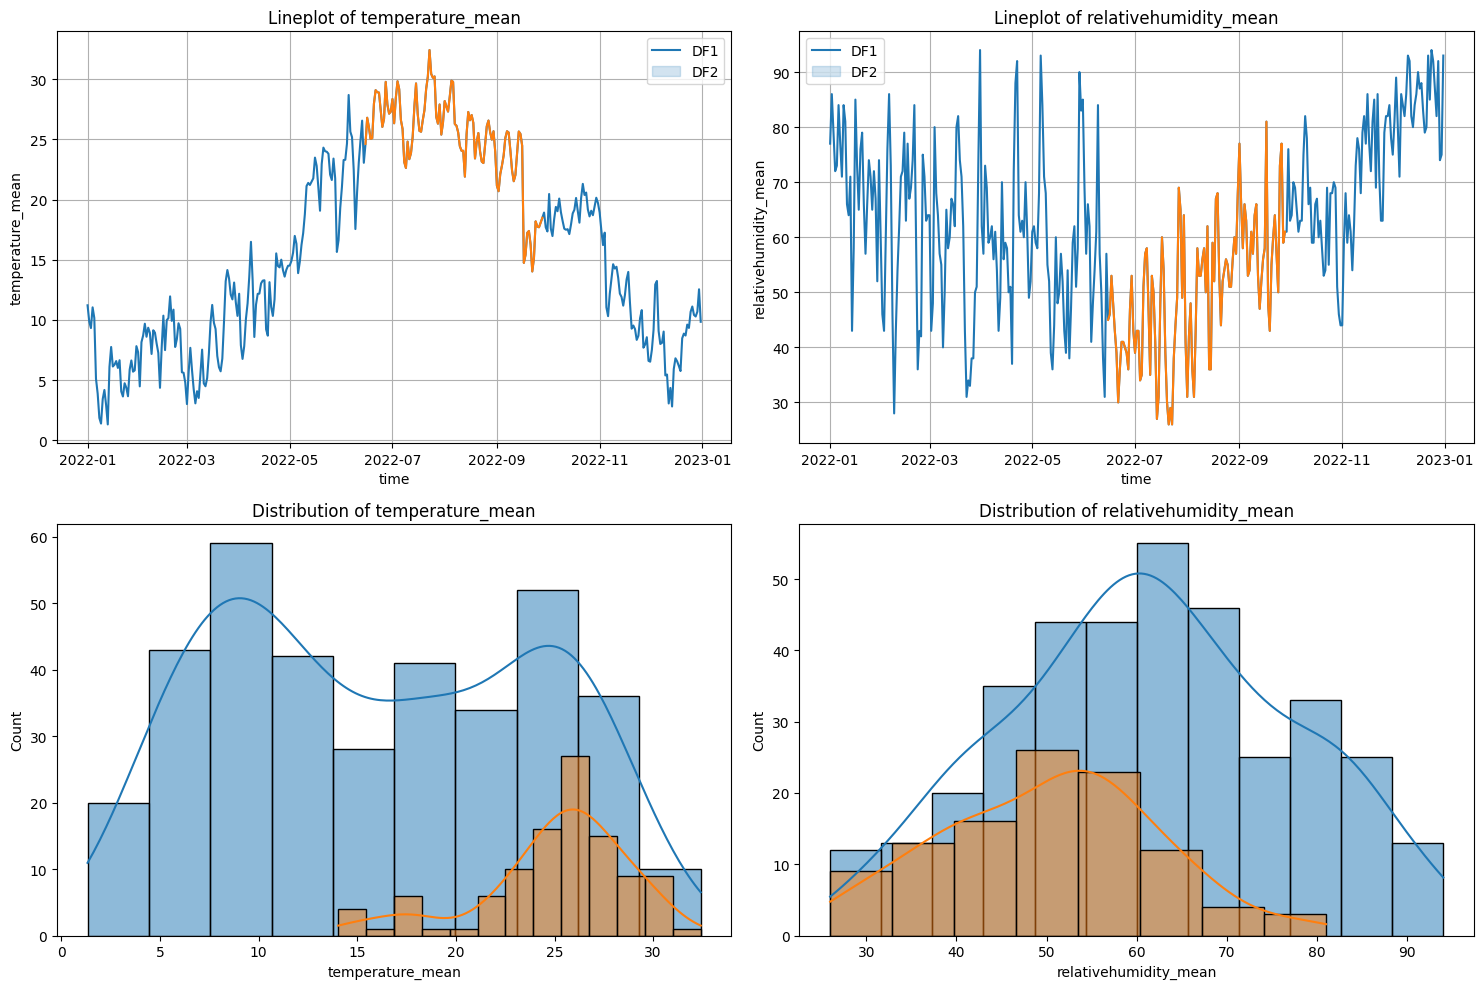

In [13]:
plot_line_and_distribution([df_1, df_2], 'time')

In [14]:
#@title Visualize the Data in Facets
interactive_inspection(df_1)

In [15]:
interactive_inspection(df_2)

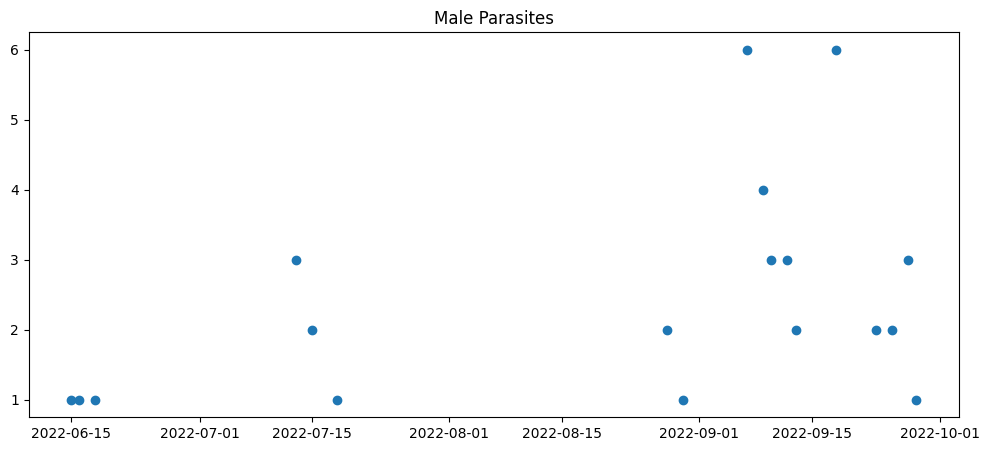

In [16]:
#@title Plots
# Filtra i dati per mostrare solo valori maggiori di zero
filtered_data = df_2[df_2['no. of Adult males'] > 0]

plt.figure(figsize=(12, 5))
plt.scatter(filtered_data.index, filtered_data['no. of Adult males'])
plt.title("Male Parasites")
plt.show()

Scatter plot per la visualizzazione della distribuzione dei dati in relazione alle tre colonne del dataset

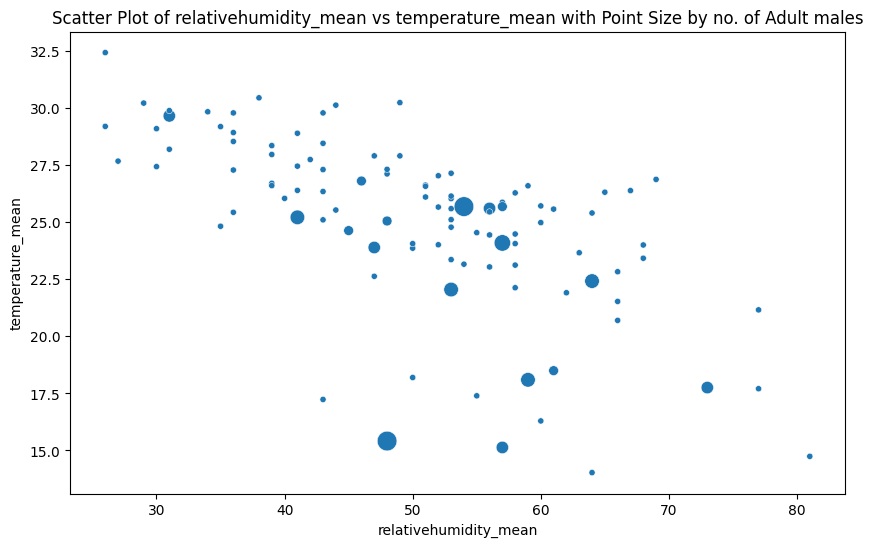

In [28]:
plot_scatter_with_size(df_2 , "relativehumidity_mean", "temperature_mean", 'no. of Adult males')

In [29]:
# Crea un oggetto figure con un sottoplot
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, subplot_titles=["Dataset without target: Environmental factors comparison"])
figure_plot(df_1)

In [30]:
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, subplot_titles=["Dataset with target: Environmental factors comparison"])
figure_plot(df_2)

## Analisi Statistiche



In [31]:
def compare_datasets_statistics(df1, df2):
    """
    Compare the statistical properties of two DataFrames, 'df1' and 'df2'.
    Performs statistical tests on common columns to check if they originate from the same distribution.
    Returns two tables with statistical summaries for each DataFrame and a table of comparison results.

    Parameters:
    df1 (pandas DataFrame): First DataFrame for comparison.
    df2 (pandas DataFrame): Second DataFrame for comparison.
    """

    def get_statistics(df):
        """
        Calculates and returns statistical summaries for the specified DataFrame.

        Parameters:
        df (pandas DataFrame): DataFrame for which statistics are to be calculated.

        Returns:
        pandas DataFrame: Statistical summaries including mean, standard deviation, skewness, and kurtosis.
        """
        stats = df.describe().T
        stats['Skewness'] = df.skew()
        stats['Kurtosis'] = df.kurtosis()
        return stats


    def compare_columns(df1, df2, common_columns):
        """
        Compares common columns between two DataFrames using the Kolmogorov-Smirnov test.
        Returns a DataFrame with the results of the comparison.

        Parameters:
        df1 (pandas DataFrame): First DataFrame for comparison.
        df2 (pandas DataFrame): Second DataFrame for comparison.
        common_columns (set): Set of common columns to be compared.

        Returns:
        pandas DataFrame: Results of the comparison including KS statistic and P-value for each common column.
        """
        comparison_results = {}
        for column in common_columns:
            if df1[column].dtype in [np.float64, np.int64] and df2[column].dtype in [np.float64, np.int64]:
                stat, p = ks_2samp(df1[column].dropna(), df2[column].dropna())
                comparison_results[column] = {'KS Statistic': stat, 'P-Value': p}
        return pd.DataFrame(comparison_results).T


    stats_df1 = get_statistics(df1)
    stats_df2 = get_statistics(df2)

    common_columns = set(df1.columns).intersection(set(df2.columns))
    comparison_results_df = compare_columns(df1, df2, common_columns)

    return stats_df1 , stats_df2 , comparison_results_df


In [32]:
stats_df1 , stats_df2 , comparison_results_df = compare_datasets_statistics(df_1, df_2)
print(f' statistical analysis of the first dataset 1\n {stats_df1}  \n \n statistical analysis of the second dataset\n {stats_df2} \n \n the Kolmogorov - Smirnov test between common column is \n {comparison_results_df}')

 statistical analysis of the first dataset 1
                        count       mean        std    min    25%    50%  \
temperature_mean       365.0  16.038740   7.965726   1.33   9.15  15.41   
relativehumidity_mean  365.0  61.249315  15.660750  26.00  50.00  61.00   

                         75%    max  Skewness  Kurtosis  
temperature_mean       23.41  32.41  0.096121 -1.266360  
relativehumidity_mean  72.00  94.00 -0.011114 -0.638466    
 
 statistical analysis of the second dataset
                        count       mean        std    min    25%    50%  \
no. of Adult males     106.0   0.415094   1.120101   0.00   0.00   0.00   
temperature_mean       106.0  25.015566   3.768792  14.03  23.70  25.64   
relativehumidity_mean  106.0  50.283019  11.928162  26.00  41.25  51.50   

                           75%    max  Skewness   Kurtosis  
no. of Adult males      0.0000   6.00  3.304269  11.802826  
temperature_mean       27.2975  32.41 -1.023589   0.944560  
relativehumidity_mean

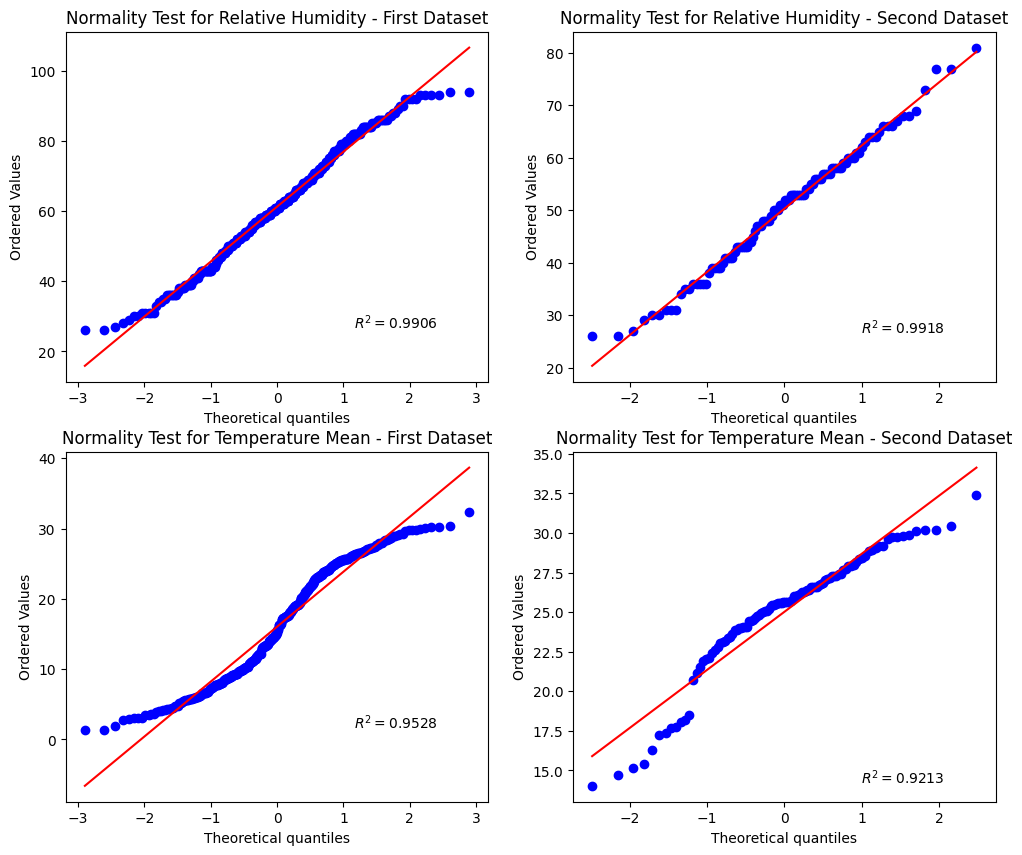

In [33]:
#@title Normality Tests

# Imposta una griglia di 1 riga e 2 colonne per i grafici
plt.figure(figsize=(12, 10))

# Primo grafico
plt.subplot(2, 2, 1)
scipy.stats.probplot(df_1['relativehumidity_mean'], plot=plt, fit=True, rvalue=True)
plt.title("Normality Test for Relative Humidity - First Dataset")

# Secondo grafico
plt.subplot(2, 2, 3)
scipy.stats.probplot(df_1['temperature_mean'], plot=plt, fit=True, rvalue=True)
plt.title("Normality Test for Temperature Mean - First Dataset")

# Terzo grafico
plt.subplot(2, 2, 2)
scipy.stats.probplot(df_2['relativehumidity_mean'], plot=plt, fit=True, rvalue=True)
plt.title("Normality Test for Relative Humidity - Second Dataset")

# Quarto grafico
plt.subplot(2, 2, 4)
scipy.stats.probplot(df_2['temperature_mean'], plot=plt, fit=True, rvalue=True)
plt.title("Normality Test for Temperature Mean - Second Dataset")

# Mostra i grafici
plt.show()

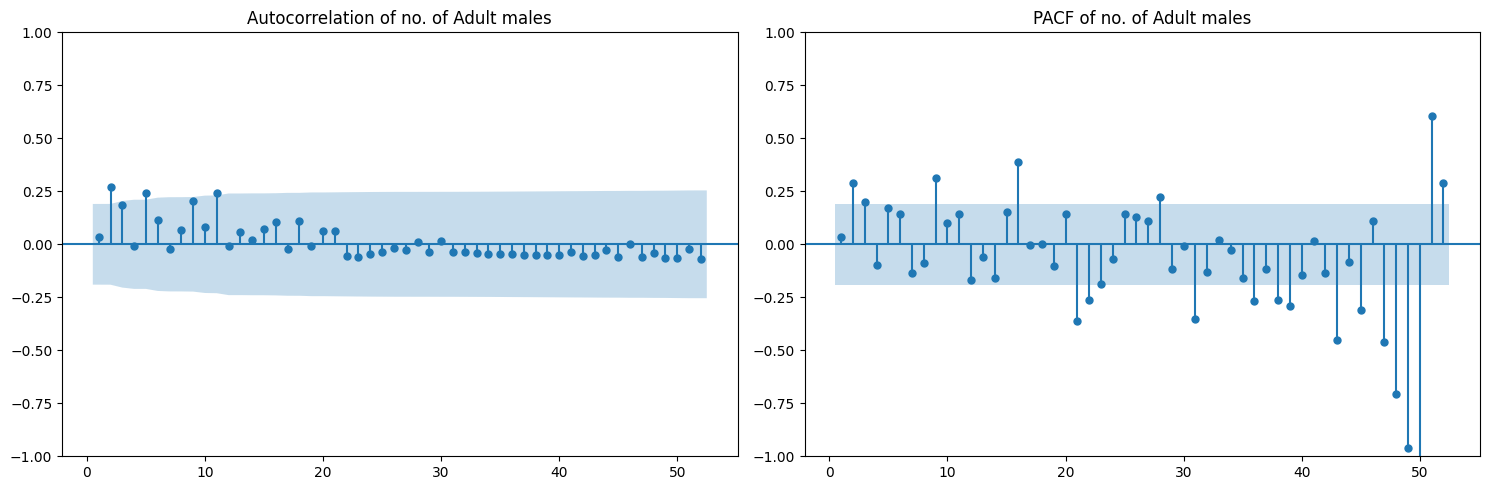

In [34]:
#@title Autocorrelation

# Creazione della figura e degli assi per i subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Grafico ACF
sgt.plot_acf(df_2['no. of Adult males'], lags=52, zero=False, title="Autocorrelation of no. of Adult males", ax=axes[0])

# Grafico PACF
sgt.plot_pacf(df_2['no. of Adult males'], lags=52, zero=False, method='ols', title="PACF of no. of Adult males", ax=axes[1])

# Imposta il layout
plt.tight_layout()

# Mostra i grafici
plt.show()

In [35]:
#@title White Noise
# Generate random data with the same property of our data
wn = np.random.normal(loc = df_2['no. of Adult males'].mean() , scale = df_2['no. of Adult males'].std() , size = len(df_2))
df_augmented = df_2.copy()
df_augmented["wn"] = wn

<ipython-input-36-92ecded4f9fa>:10: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



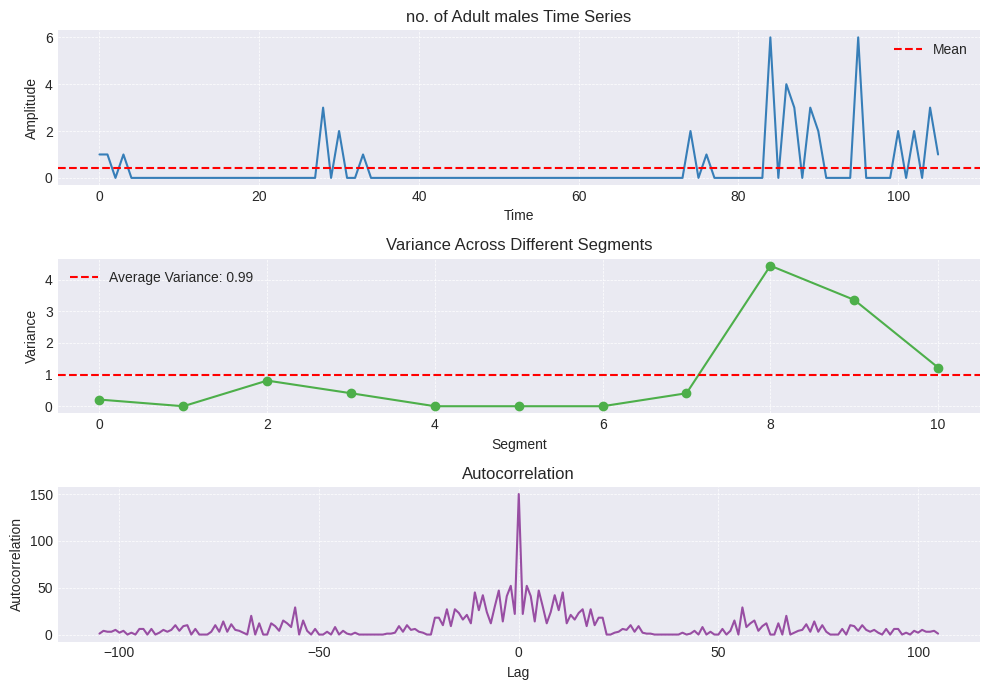

In [36]:
def plot_white_noise_characteristics(df, column_name):
    """
    Plots the characteristics of white noise for a specified column in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to analyze.
    """
    # Enhanced settings for a professional look
    plt.style.use('seaborn-darkgrid')
    palette = plt.get_cmap('Set1')

    # Extracting the specified column
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame.")
        return
    data = df[column_name].dropna()

    # Time settings
    num_samples = len(data)
    time = np.linspace(0, num_samples , num_samples, endpoint=False)

    # Segmenting the signal and calculating variance for each segment
    segment_length = num_samples // 10
    variances = [np.var(data[i:i + segment_length]) for i in range(0, num_samples, segment_length)]

    # Computing Autocorrelation
    autocorr = correlate(data, data, mode='full')
    autocorr_lags = np.arange(-num_samples + 1, num_samples)

    # Plotting
    plt.figure(figsize=(10, 7))

    # Plot 1: Time Series
    plt.subplot(3, 1, 1)
    plt.plot(time, data, color=palette(1), linewidth=1.5)
    plt.title(f"{column_name} Time Series")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.axhline(y=np.mean(data), color='r', linestyle='--', label="Mean")
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot 2: Variance Across Segments
    plt.subplot(3, 1, 2)
    plt.plot(variances, color=palette(2), linewidth=1.5, marker='o')
    plt.title("Variance Across Different Segments")
    plt.xlabel("Segment")
    plt.ylabel("Variance")
    plt.axhline(y=np.mean(variances), color='r', linestyle='--', label=f"Average Variance: {np.mean(variances):.2f}")
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot 3: Autocorrelation
    plt.subplot(3, 1, 3)
    plt.plot(autocorr_lags, autocorr, color=palette(3), linewidth=1.5)
    plt.title("Autocorrelation")
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()


plot_white_noise_characteristics(df_2, 'no. of Adult males')

In [37]:
#@title Random Walk
# Number of steps
n = 106

# Generate random walk
np.random.seed(50)
steps = np.random.standard_normal(n)
random_walk = np.cumsum(steps)

# Highlight two different parts of the time series
# Selecting two different parts randomly
part1 = range(200, 400)
part2 = range(600, 800)


<ipython-input-36-92ecded4f9fa>:10: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



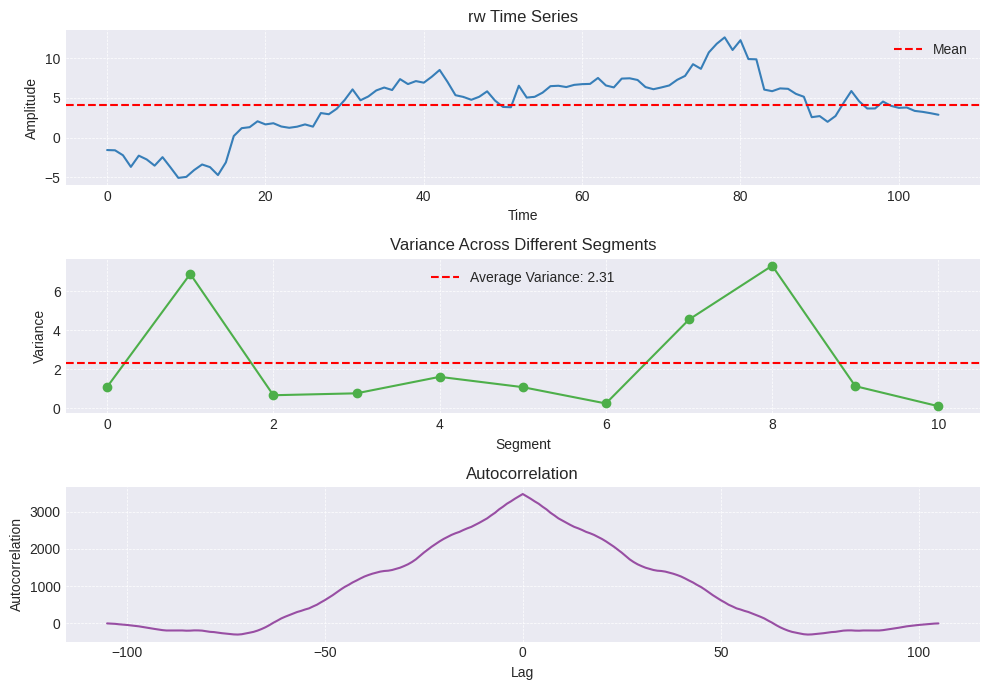

In [38]:
df_augmented['rw'] = random_walk
plot_white_noise_characteristics(df_augmented, 'rw')

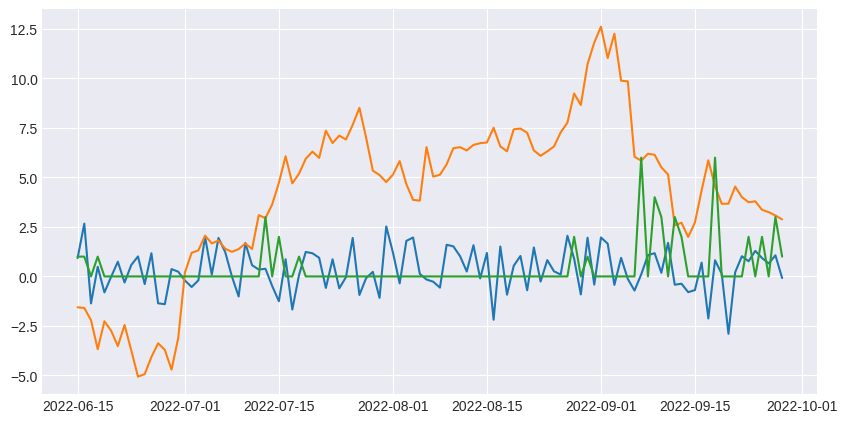

In [39]:
#@title Time Series Comparison
plt.figure(figsize=(10,5))
plt.plot(df_augmented.wn)
plt.plot(df_augmented.rw)
plt.plot(df_augmented['no. of Adult males'])

In [40]:
#@title Stationarity
# Verify of Stationality
result = adfuller(df_2['no. of Adult males'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.7486320682619203
p-value: 0.40624582407258286
Critical Values: {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176}


The series is not stationary because the p-value > 0.05.

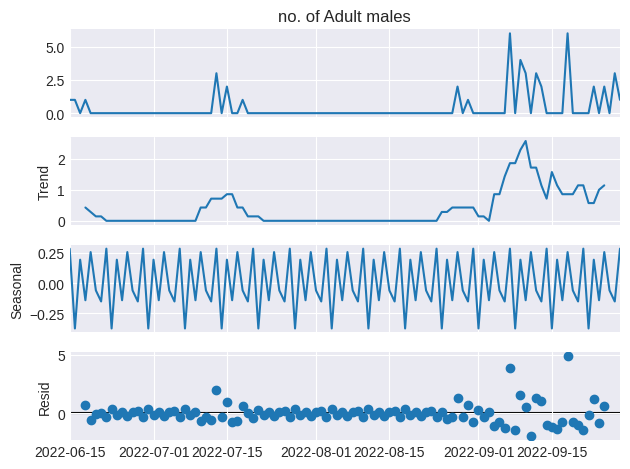

In [41]:
#@title Seasonality
# Verify of Stagionality
s_dec_multiplicative = seasonal_decompose(df_2['no. of Adult males'], model = "additive")
s_dec_multiplicative.plot()
plt.show()

The Residual plot has a tail -> it is not good for the dataset

# Training

In [42]:
#@title Splitting
# Manual Split: 80-10-10
train_size = int(len(df_2)*0.8)
val_size = int(len(df_2)*0.1)
df_train = df_2.iloc[:train_size]
df_valid = df_2.iloc[train_size:train_size+val_size+1]
df_test = df_2.iloc[train_size+val_size+1:]

## MODELLI STATISTICI


In [71]:
#@title VAR Model

# Check stationarity of series
def check_stationarity(series):
    """
    Performs the Augmented Dickey-Fuller test to check the stationarity of a time series.

    Parameters:
    series (pd.Series): The time series to test for stationarity.

    Returns:
    bool: True if the series is stationary, False otherwise.
    """
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    if result[1] <= 0.05:
        print(f"The column is stationary.")
        return True
    else:
        print(f"The column is not stationary.")
        return False


Let's make the series stationary

In [72]:
# Check stationarity for each column in the DataFrame
for column in df_2.columns:
    print(f"Stationarity of column '{column}':")
    check_stationarity(df_2[column])
    print("\n")

# Let's differentiate the series in order to make it stationary
df_diff = df_2.diff().dropna()
print('*'*100)
print('\n')

# Check stationarity for each column after differentiation
for column in df_diff.columns:
    print(f"Stazionarity of column '{column}' after differentiation:")
    check_stationarity(df_diff[column])
    print("\n")

Stationarity of column 'no. of Adult males':
ADF Statistic: -1.7486320682619203
p-value: 0.40624582407258286
Critical Values: {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176}
The column is not stationary.


Stationarity of column 'temperature_mean':
ADF Statistic: -1.7980415266996554
p-value: 0.38143445385122743
Critical Values: {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}
The column is not stationary.


Stationarity of column 'relativehumidity_mean':
ADF Statistic: -1.2885324468887853
p-value: 0.6344022666366832
Critical Values: {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176}
The column is not stationary.


****************************************************************************************************


Stazionarity of column 'no. of Adult males' after differentiation:
ADF Statistic: -5.58640366901165
p-value: 1.359832627352785e-06
Critical Values: {'1%': -3.5011373281819504

In [73]:
# Make splitting 80-10-10
train_size = int(len(df_diff)*0.8)
val_size = int(len(df_diff)*0.1)
df_diff_train = df_diff.iloc[:train_size+1]
df_diff_val = df_diff.iloc[train_size+1:train_size+val_size+1]
df_diff_test = df_diff.iloc[train_size+val_size+1:]

In [74]:
# Max lags to examine (found from observation of PACF)
max_lag = 20

lags = range(1, max_lag + 1)

# Initialize variables
best_rmse = float('inf')
best_lag = None

# Compute grid search
for lag in lags:
    model = VAR(df_diff_train)
    results = model.fit(lag)

    # Make predictions
    forecast = results.forecast(df_diff_train.values, steps=len(df_diff_val))
    target_forecast = []
    for i in range(len(df_diff_val)):
      target_forecast.append(forecast[i,0])

    # Compute RMSE
    rmse = sqrt(mean_squared_error(df_diff_val['no. of Adult males'], target_forecast))

    # Update best parameters
    if rmse < best_rmse:
        best_rmse = rmse
        best_lag = lag

print(f'Miglior modello: Lag Order {best_lag}, RMSE: {best_rmse}')

Miglior modello: Lag Order 6, RMSE: 2.231493323466737


In [75]:
# Create and fit model VAR on the new stationary series
model = VAR(df_diff_train)
results = model.fit(6)

# Print VAR results
print(results.summary())
results_fitted = results.fittedvalues.iloc[1:]

# Compute RMSE (Root Mean Squared Error) e AIC (Akaike Information Criterion)
min_length = min(len(df_diff_train), len(results_fitted))  # make shapes compatible
rmse_value = rmse_function(df_diff_train.iloc[:min_length], results_fitted.iloc[:min_length])
aic_value = aic(results.aic, len(df_diff_train.columns), df_modelwc=len(results.params))
print(f'RMSE: {rmse_value}')
print(f'AIC: {aic_value}')

# Make predictions
lag_order = results.k_ar
forecast = results.forecast(df_diff_train.values[-lag_order:], steps=len(df_diff_test))

# Print predictions
print(f'Predictions for next {df_diff_test} observations:\n{forecast}')

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 18, Dec, 2023
Time:                     17:38:05
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    6.08641
Nobs:                     79.0000    HQIC:                   5.06173
Log likelihood:          -452.172    FPE:                    81.9116
AIC:                      4.37681    Det(Omega_mle):         42.9090
--------------------------------------------------------------------
Results for equation no. of Adult males
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.056255         0.094925            0.593           0.553
L1.no. of Adult males           -1.047008         0.126650           -8.267           0.000
L1.

In [76]:
# Estraiamo solo la colonna target
target_forecast= forecast[:, 0]

# Confronta le previsioni con i valori effettivi del test
comparison = pd.DataFrame({'Predicted': target_forecast, 'Actual': df_diff_test['no. of Adult males']})

# Ora puoi analizzare la differenza tra i valori previsti e quelli effettivi
comparison['Difference'] = comparison['Actual'] - comparison['Predicted']

rmse = np.sqrt(mean_squared_error(comparison['Actual'], comparison['Predicted']))
mae = mean_absolute_error(comparison['Actual'], comparison['Predicted'])

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 3.450927852200181
MAE: 2.6347223064268612


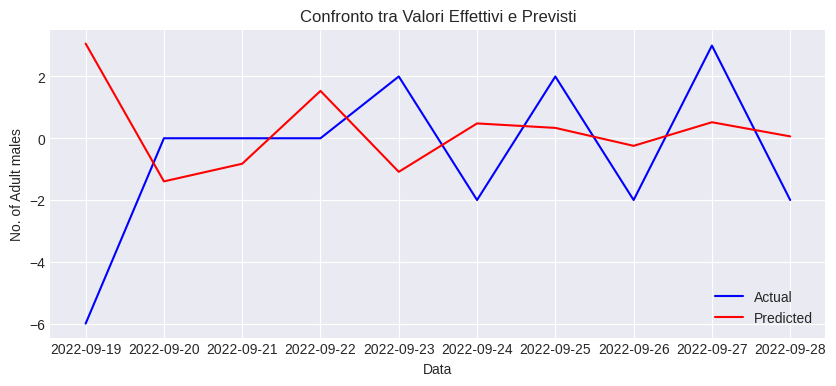

In [77]:
# Confronta le previsioni con i valori effettivi del test
comparison = pd.DataFrame({'Predicted': target_forecast, 'Actual': df_diff_test['no. of Adult males']})
plot_results(comparison.index, comparison['Actual'], comparison.index, comparison['Predicted'])

In [78]:
#@title AUTO-ARIMAX Model

# Concatenate training e validation
df_diff_train_val = pd.concat([df_diff_train, df_diff_val])

# Including multiple exogenous variables
exog_vars = df_diff_train_val[['relativehumidity_mean','temperature_mean']]

model_auto = auto_arima(df_diff_train_val['no. of Adult males'], exogenous = exog_vars,
                       max_order = None, max_p = 7, max_q = 7, max_d = 5,
                       maxiter = 50, alpha = 0.05, trend = 'ct', information_criterion = 'aic',
                       out_of_sample = len(df_diff_val))

print(model_auto)

 ARIMA(1,0,1)(0,0,0)[0] intercept


In [79]:
best_order = model_auto.get_params(0)['order']

model = ARIMA(df_diff_train_val['no. of Adult males'], exog = exog_vars, order=best_order)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     no. of Adult males   No. Observations:                   95
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -137.579
Date:                Mon, 18 Dec 2023   AIC                            287.158
Time:                        17:38:35   BIC                            302.481
Sample:                    06-16-2022   HQIC                           293.350
                         - 09-18-2022                                         
Covariance Type:                  opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0103      0.060      0.172      0.864      -0.108       0.128
relativehumidity_mean    -0.0308      0.017     -1.829      0.067      -0.064       0.002
temperature_mean         -0.1276      0.030     -4.283      0.000      -0.186      -0.069
ar.L1                    -0.3891      0.186     -2.088      0.037      -0.754      -0.024
ma.L1                    -0.5090      0.119     -4.267      0.000      -0.743      -0.275
sigma2                    1.0511      0.101     10.374      0.000       0.853       1.250
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               985.04
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               6.01   Skew:                             2.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
# Facciamo le predizioni sul test
start_date = df_diff_test.index[0]
end_date = df_diff_test.index[-1]
forecast = results.predict(start = start_date, end = end_date, exog=df_diff_test[['relativehumidity_mean','temperature_mean']])

# Confronta le previsioni con i valori effettivi del test
comparison = pd.DataFrame({'Predicted': forecast, 'Actual': df_diff_test['no. of Adult males']})

# Ora puoi analizzare la differenza tra i valori previsti e quelli effettivi
comparison['Difference'] = comparison['Actual'] - comparison['Predicted']

rmse = np.sqrt(mean_squared_error(comparison['Actual'], comparison['Predicted']))
mae = mean_absolute_error(comparison['Actual'], comparison['Predicted'])

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 1.8225002327472086
MAE: 1.688201953490547


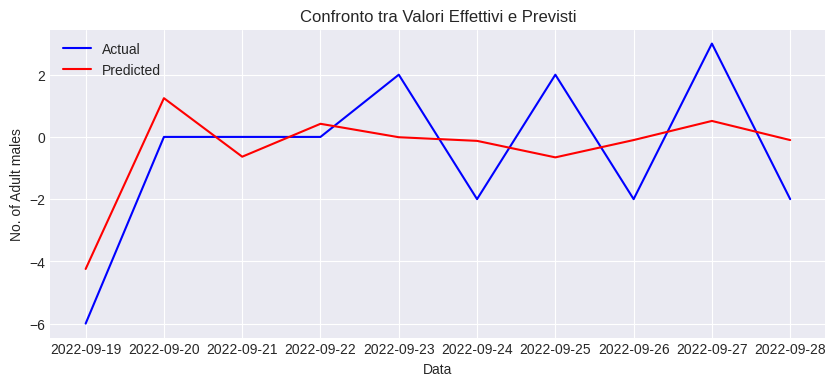

In [81]:
plot_results(comparison.index, comparison['Actual'], comparison.index, comparison['Predicted'])

## MACHINE LEARNING

In [60]:
# Determine the number of optimal lags for each column
def find_optimal_lags(dataframe, columnnames, max_lags=20):
    """
    Function to find the optimal number of lags for each column to satisfy the ADF test.

    Args:
    dataframe (pd.DataFrame): The dataframe containing the time series data.
    columnnames (list): List of column names to evaluate.
    max_lags (int): Maximum number of lags to test for stationarity.

    Returns:
    dict: Dictionary of column names and their respective optimal number of lags.
    """
    optimal_lags = {}
    for column in columnnames:
        for lag in range(1, max_lags + 1):
            # Apply differencing based on the current lag
            differenced_series = dataframe[column].diff(lag).dropna()

            # Perform ADF test
            p_value = adfuller(differenced_series)[1]

            # Check if the series is stationary
            if p_value <= 0.05:
                optimal_lags[column] = lag
                break
        else:
            # If none of the lags up to max_lags make the series stationary,
            # use the max_lags value
            optimal_lags[column] = max_lags

    return optimal_lags

column_names = df_2.columns
optimal_lags = find_optimal_lags(df_2, column_names)
print(optimal_lags)

{'no. of Adult males': 1, 'temperature_mean': 1, 'relativehumidity_mean': 1}


In [61]:
# Create a new dataframe with the lagged version of columns
def create_combined_dataset(dataframe, optimal_lags, target_column):
    """
    Create a combined dataset with original features, their lagged versions, and the original target variable.

    Args:
    dataframe (pd.DataFrame): The original dataframe.
    optimal_lags (dict): Dictionary of column names and their respective optimal number of lags.
    target_column (str): Name of the target column.

    Returns:
    pd.DataFrame: Dataframe with original features, lagged features, and the original target variable.
    """
    combined_df = pd.DataFrame(index=dataframe.index)

    # Include original features
    for column in dataframe.columns:
        if column != target_column:  # Exclude target column from lagging
            combined_df[column] = dataframe[column]

            # Create lagged features for each column based on optimal lags
            for lag in range(1, optimal_lags.get(column, 1) + 1):
                combined_df[f'{column}_lag_{lag}'] = dataframe[column].shift(lag)

    # Add the original target variable
    combined_df[target_column] = dataframe[target_column]

    # Remove rows with NaN values created by lagging
    combined_df.dropna(inplace=True)
    return combined_df

target_column = 'no. of Adult males'
combined_df = create_combined_dataset(df_2, optimal_lags, target_column)
combined_df.head()

,temperature_mean,temperature_mean_lag_1,relativehumidity_mean,relativehumidity_mean_lag_1,no. of Adult males
Date,,,,,
2022-06-16,26.79,24.62,46,45.0,1
2022-06-17,26.02,26.79,53,46.0,0
2022-06-18,25.04,26.02,48,53.0,1
2022-06-19,25.09,25.04,43,48.0,0
2022-06-20,27.95,25.09,39,43.0,0


In [62]:
# Manual Split: 90-10
train_size = int(len(combined_df)*0.9)
df_train = combined_df.iloc[:train_size]
df_test = combined_df.iloc[train_size:]

In [63]:
#@title Regression Tree
# Dividi i dati in set di addestramento e test
X_train = df_train.drop(target_column, axis=1)
y_train = df_train[target_column]
X_test = df_test.drop(target_column, axis=1)
y_test = df_test[target_column]

Tuning degli iperparametri

In [64]:
# Tuning degli iperparametri

# Definisci il modello
regression_tree = DecisionTreeRegressor()

# Definisci i parametri da esplorare
param_grid = {
    'criterion': ['squared_error','friedman_mse','absolute_error','poisson'],  # 'mse' per l'errore quadratico medio, 'mae' per l'errore assoluto medio
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2]
}

# Inizializza la ricerca grid o la ricerca casuale
random_search = RandomizedSearchCV(regression_tree, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Addestra il modello con la ricerca grid o casuale
random_search.fit(X_train, y_train)

# Stampa i migliori parametri
print("Best Parameters:", random_search.best_params_)

# Ottieni il modello con i migliori parametri
best_regressor = random_search.best_estimator_

Best Parameters: {'min_weight_fraction_leaf': 0.2, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'poisson'}


In [65]:
# Effettua delle previsioni sul set di test
y_pred = best_regressor.predict(X_test)

# Valuta le prestazioni del modello
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.115702479338843


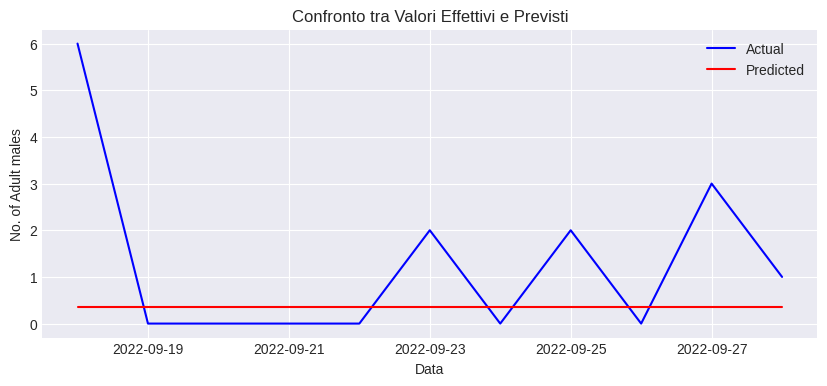

In [66]:
plot_results(df_test.index, y_test, df_test.index, y_pred)

## DEEP LEARNING

In [67]:
#@title Neural Network Model

def preprocess_data(dataframe, target_column):
    """
    Preprocess the data for MLP training. Splits data, normalizes features, and creates an MLP model.

    Args:
    dataframe (pd.DataFrame): The input dataframe.
    target_column (str): The name of the target column in the dataframe.

    Returns:
    tuple: (X_train, X_test, y_train, y_test, model) where `model` is an instance of a Keras Sequential model.
    """
    # Splitting the dataset into features and target
    X = dataframe.drop(target_column, axis=1)
    y = dataframe[target_column]

    # Manual split
    train_size = int(len(dataframe)*0.8)
    val_size = int(len(dataframe)*0.1)
    X_train = X.iloc[:train_size+1]
    y_train = y.iloc[:train_size+1]
    X_val = X.iloc[train_size+1:train_size+1+val_size]
    y_val = y.iloc[train_size+1:train_size+1+val_size]
    X_test = X.iloc[train_size+1+val_size:]
    y_test = y.iloc[train_size+1+val_size:]

    # Normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Define MLP model
    model = Sequential()
    model.add(Dense(200, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='relu'))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, model

x_train, x_val, x_test, y_train, y_val, y_test, model = preprocess_data(combined_df, target_column)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1000      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21201 (82.82 KB)
Trainable params: 21201 (82.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
3/3 [==============================] - 2s 209ms/step - loss: 0.6711 - val_loss: 7.4000
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 0.6706 - val_loss: 7.4000
Epoch 3/100
3/3 [==============================] - 0s 42ms/step - loss: 0.6706 - val_loss: 7.4000
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 0.6706 - val_loss: 7.4000
Epoch 5/100
3/3 [==============================] - 0s 87ms/step - loss: 0.6706 - val_loss: 7.4000
Epoch 6/100
3/3 [==============================] - 0s 35ms/step - loss: 0.6706 - val_loss: 7.4000
Epoch 7/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6706 - val_loss: 7.4000
Epoch 8/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6706 - val_loss: 7.4000
Epoch 9/100
3/3 [==============================] - 0s 29ms/step - loss: 0.6706 - val_loss: 7.4000
Epoch 10/100
3/3 [==============================] - 0s 35ms/step - loss: 0.6706 - val_loss: 7.4000
Epoch 11/100
3/3 [

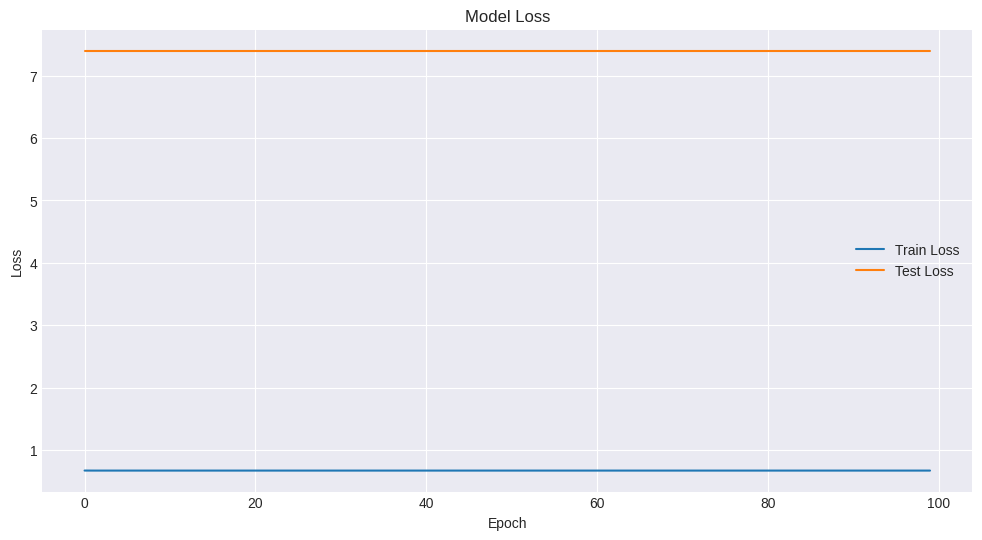

In [68]:
# Fit the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), verbose=1)

# After fitting the model, you can evaluate its performance
loss = model.evaluate(x_val, y_val, verbose=0)
print(f"Test Loss: {loss}")

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [69]:
# Effettua delle previsioni sul set di test
y_pred = model.predict(x_test)

# Valuta le prestazioni del modello
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

1/1 [==============================] - 0s 91ms/step
Mean Squared Error: 1.8


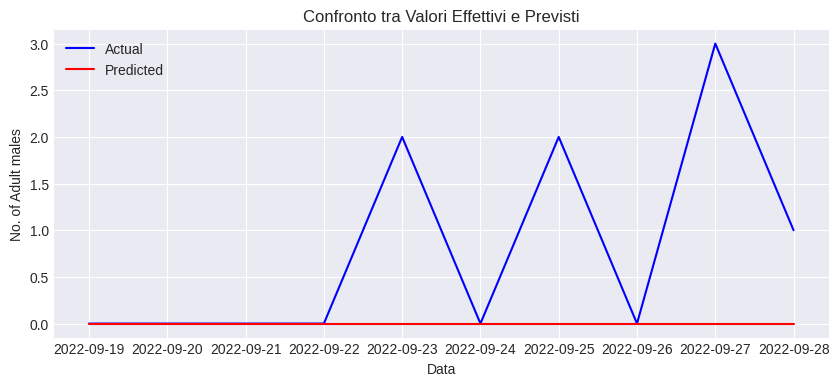

In [70]:
plot_results(y_test.index, y_test, y_test.index, y_pred)